# Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import ML_lib
import importlib

# for debug purposes, reload the module to reflect recent changes
importlib.reload(ML_lib)

<module 'ML_lib' from 'c:\\Users\\maxim\\Godot Games\\Snake\\python-test-folder\\ML_lib.py'>

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [27]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

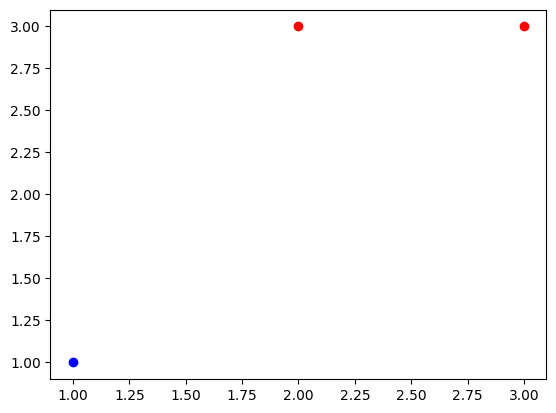

In [35]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()

Init weights: [[ 0.2855214 ]
 [-0.1235278 ]
 [-0.14036824]]
Final weights: [[ 0.2855214 ]
 [-0.1235278 ]
 [-0.14036824]]


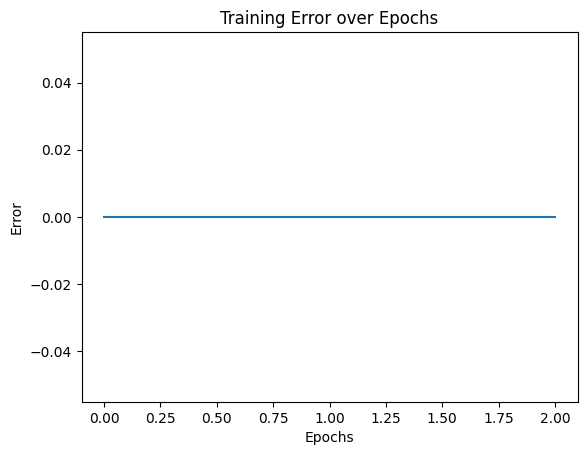

In [36]:
pc = ML_lib.PerceptronModel(input_size=2)
print("Init weights:", pc.get_weights())
error_history = pc.train(X, Y, epochs=400, learning_rate=0.01)
print("Final weights:", pc.get_weights())
plt.plot(error_history)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

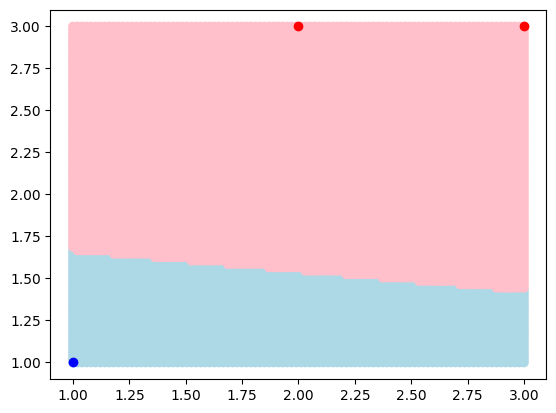

In [34]:
# Create grid points using meshgrid
x1 = np.linspace(1, 3, 100)
x2 = np.linspace(1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# Reshape into input array for predict_batch
X_bg = np.column_stack((X1.ravel(), X2.ravel()))

# Get predictions for all points at once
predictions = pc.predict_batch(X_bg)[:,0]

# Create color array
colors = np.where(predictions == -1, 'pink', 'lightblue')

# Plot scatter
plt.scatter(X_bg[:,0], X_bg[:,1], c=colors)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [39]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

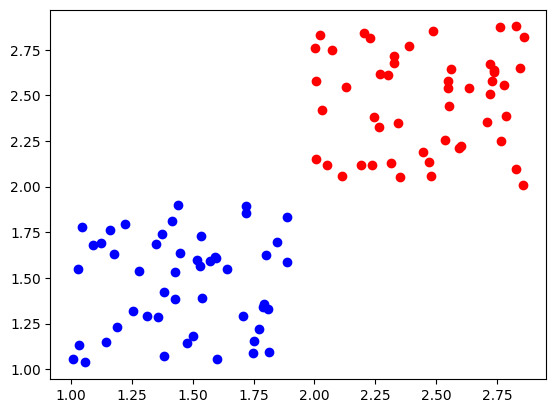

In [40]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

Init weights: [[ 0.56503744]
 [-0.41330354]
 [-0.03898943]]
Final weights: [[ 0.96503744]
 [-0.27553159]
 [-0.22329922]]


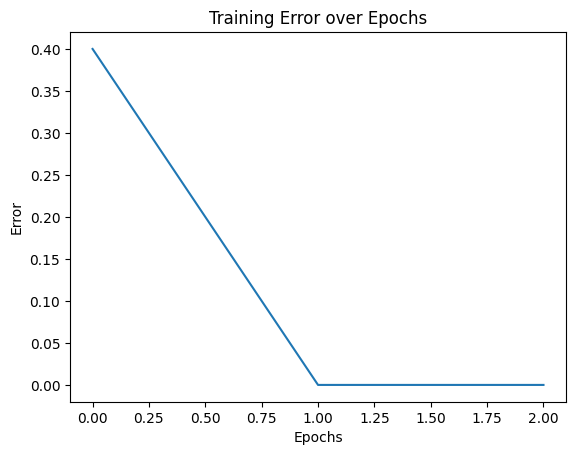

In [89]:
pc = ML_lib.PerceptronModel(input_size=2)
print("Init weights:", pc.get_weights())
error_history = pc.train(X, Y, epochs=400, learning_rate=0.1)
print("Final weights:", pc.get_weights())
plt.plot(error_history)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

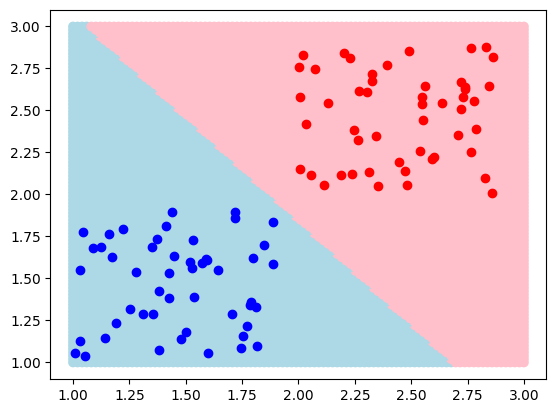

In [90]:
# Create grid points using meshgrid
x1 = np.linspace(1, 3, 100)
x2 = np.linspace(1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

# Reshape into input array for predict_batch
X_bg = np.column_stack((X1.ravel(), X2.ravel()))

# Get predictions for all points at once
predictions = pc.predict_batch(X_bg)[:,0]

# Create color array
colors = np.where(predictions == -1, 'pink', 'lightblue')

# Plot scatter
plt.scatter(X_bg[:,0], X_bg[:,1], c=colors)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [114]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

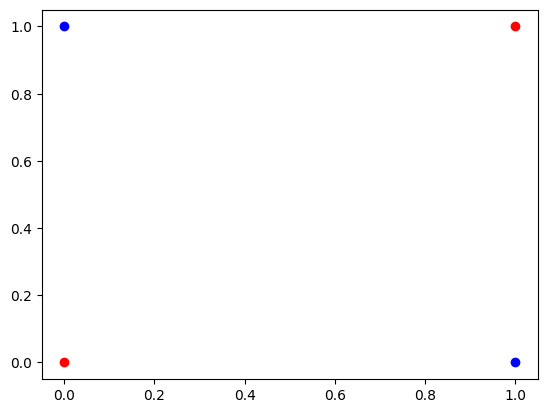

In [115]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

Init weights: [[ 0.55660652]
 [-0.36646019]
 [ 0.75348697]]
Final weights: [[-1.44339348]
 [-0.36646019]
 [ 0.75348697]]


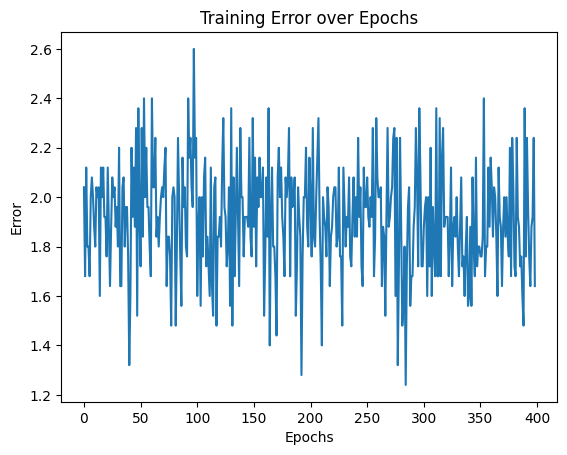

In [117]:
pc = ML_lib.PerceptronModel(input_size=2)
print("Init weights:", pc.get_weights())
error_history = pc.train(X, Y, epochs=40000, learning_rate=1)
print("Final weights:", pc.get_weights())
plt.plot(error_history)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error over Epochs")
plt.show()

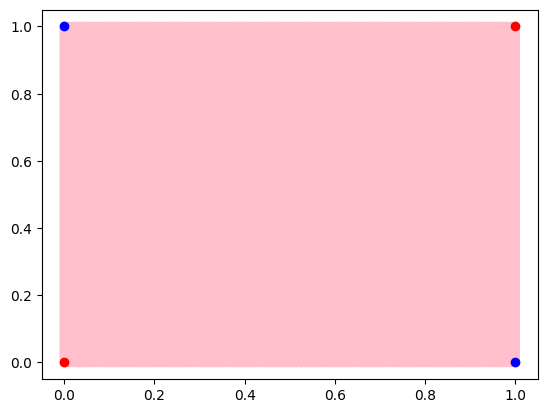

In [118]:
# Create grid points using meshgrid
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Reshape into input array for predict_batch
X_bg = np.column_stack((X1.ravel(), X2.ravel()))

# Get predictions for all points at once
predictions = pc.predict_batch(X_bg)[:,0]

# Create color array
colors = np.where(predictions == -1, 'pink', 'lightblue')

# Plot scatter
plt.scatter(X_bg[:,0], X_bg[:,1], c=colors)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

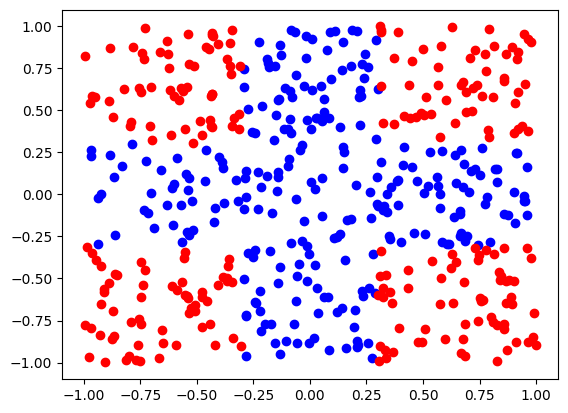

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1, -1, -1]for p in X])

X = X[[not np.all(arr == [-1, -1, -1]) for arr in Y]]
Y = Y[[not np.all(arr == [-1, -1, -1]) for arr in Y]]

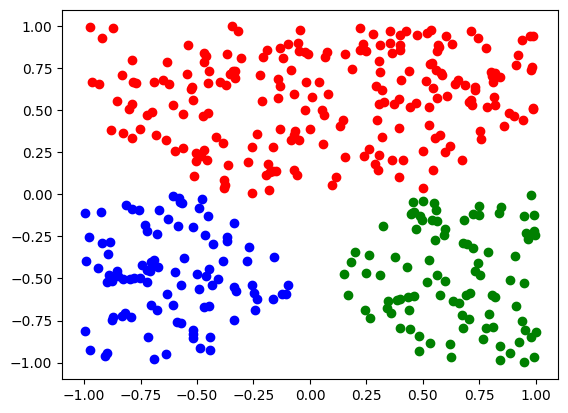

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

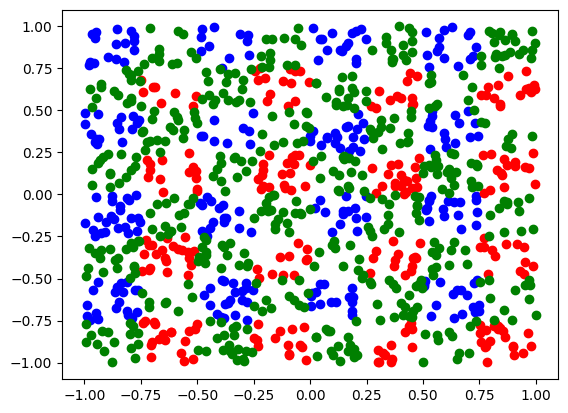

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

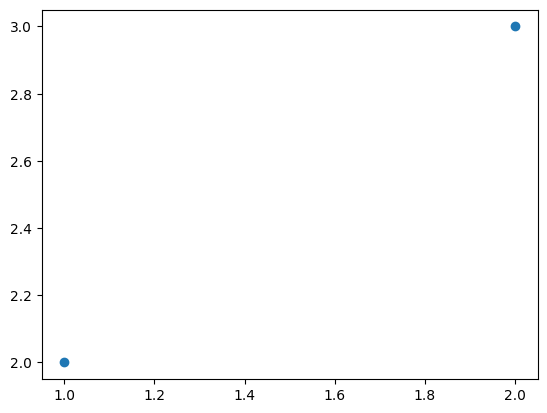

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

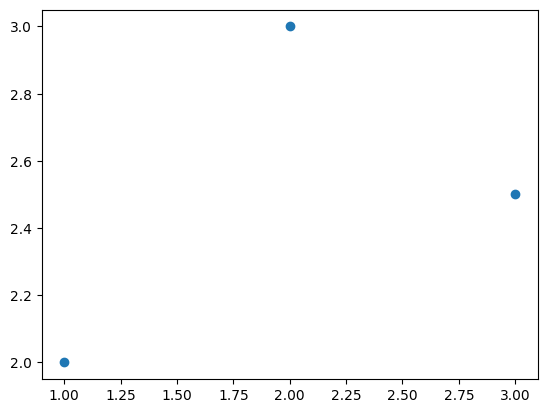

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [126]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

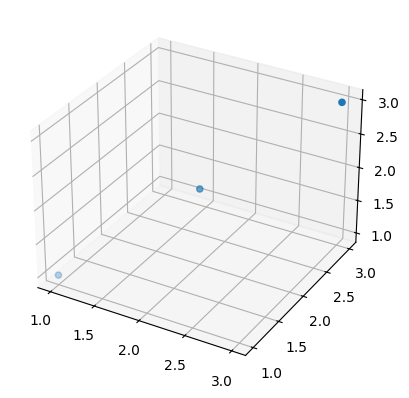

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # This is the key change

# Your plot command is correct
ax.scatter(X[:,0], X[:,1], Y)

plt.show()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [132]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [135]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [130]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [131]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>